# Universidad Politécnica Salesiana
## Entrenamiento de una red neuronal Convolucional
## Clasificación de perros y gatos
### Por Alexander Siavichay

Disponible en: https://github.com/siavichay/CNN/blob/master/CNN_desde_cero%2C_Perros_y_Gatos_con_toolkit_Parte_1.ipynb

En este libro de Python se presenta la implementación de un algoritvo de Red Neuronal Convolucional - Convolutional Neural Networks (CNNs). Luego se utiliza el algoritmo para el análisis del dataset Perros y Gatos.
Esta implementacion se realizara con el toolkit de keras.

Luego los resultados seran comparados con un algoritmo escrito desde cero.


Prerequisitos

- ImageDataGenerator
- numpy
- matplotlib
- pickle
- keras.utils
- tensorflow

## CNN- Redes Neuronales Convolucionales
Son redes neuronales que utilizan capas convolucionales, es decir, capas que utilizan el argumento matemático de la convolución. 
Estas capas consisten en varios filtros, en forma de matrices que se convolucionan con la matriz de entrada (imagen).

### Carga del Dataset
El dataset tiene la siguiente estructura:
- /dogscats
    - /train
        - /cats
            - cat.0.jpg
            - ...
            - cat.12499.jpg
        - /dogs
            - dog.0.jpg
            - ...
            - dog.12499.jpg
    - /valid
        - /cats
            - cat.2.jpg
            - ...
            - cat.12480.jpg
        - /dogs
            - dog.3.jpg
            - ...
            - dog.12480.jpg

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)

training_set = train_datagen.flow_from_directory("dogscats/train",
 target_size = (64, 64),
 batch_size = 32,
 class_mode = "binary")

Using TensorFlow backend.


Found 23000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("dogscats/valid",
 target_size = (64, 64),
 batch_size = 32,
 class_mode = "binary")

Found 2000 images belonging to 2 classes.


## Creación de la red con Keras

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


### Inicialización de la Red CNN

In [6]:
classifier = Sequential()

### Capa de convolución

In [7]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = "relu"))

Instructions for updating:
Colocations handled automatically by placer.


### Capa de Pooling

In [8]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Segunda capa Convolucional

In [9]:
classifier.add(Conv2D(32, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Capa de Flattening
Esta capa permite optimizar los datos de entrada a la red

In [11]:
classifier.add(Flatten())

### Uniendo toda la red

In [12]:
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dense(units = 1, activation = "sigmoid"))

### Se compila el modelo de red creado
En este paso es necesario optimizar el modelo, en este caso utilizamos el proceso estocástico Adam, y la función de pérdida cross entropy.

In [13]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Entrenamiento

In [16]:
classifier.fit_generator(training_set, steps_per_epoch = 200,
                         verbose=2,
                         epochs = 50, validation_data = test_set,
                         validation_steps = 50)


Epoch 1/50
 - 52s - loss: 0.4113 - accuracy: 0.8088 - val_loss: 0.8154 - val_accuracy: 0.7912
Epoch 2/50
 - 50s - loss: 0.4251 - accuracy: 0.7994 - val_loss: 0.7561 - val_accuracy: 0.7601
Epoch 3/50
 - 50s - loss: 0.4106 - accuracy: 0.8091 - val_loss: 0.5502 - val_accuracy: 0.7866
Epoch 4/50
 - 51s - loss: 0.3958 - accuracy: 0.8172 - val_loss: 0.3340 - val_accuracy: 0.7809
Epoch 5/50
 - 50s - loss: 0.4226 - accuracy: 0.8033 - val_loss: 0.5510 - val_accuracy: 0.7794
Epoch 6/50
 - 55s - loss: 0.4137 - accuracy: 0.8073 - val_loss: 0.5373 - val_accuracy: 0.7544
Epoch 7/50
 - 58s - loss: 0.3978 - accuracy: 0.8227 - val_loss: 0.4055 - val_accuracy: 0.7822
Epoch 8/50
 - 51s - loss: 0.4035 - accuracy: 0.8114 - val_loss: 0.6494 - val_accuracy: 0.7828
Epoch 9/50
 - 51s - loss: 0.4145 - accuracy: 0.8098 - val_loss: 0.4894 - val_accuracy: 0.7835
Epoch 10/50
 - 52s - loss: 0.4037 - accuracy: 0.8175 - val_loss: 0.3628 - val_accuracy: 0.7769
Epoch 11/50
 - 51s - loss: 0.4187 - accuracy: 0.8032 - val_

In [78]:
predicciones=classifier.predict_generator(test_set, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=2)

63/63 [==============================] - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 9s 143ms/step


## PREDICCIONES

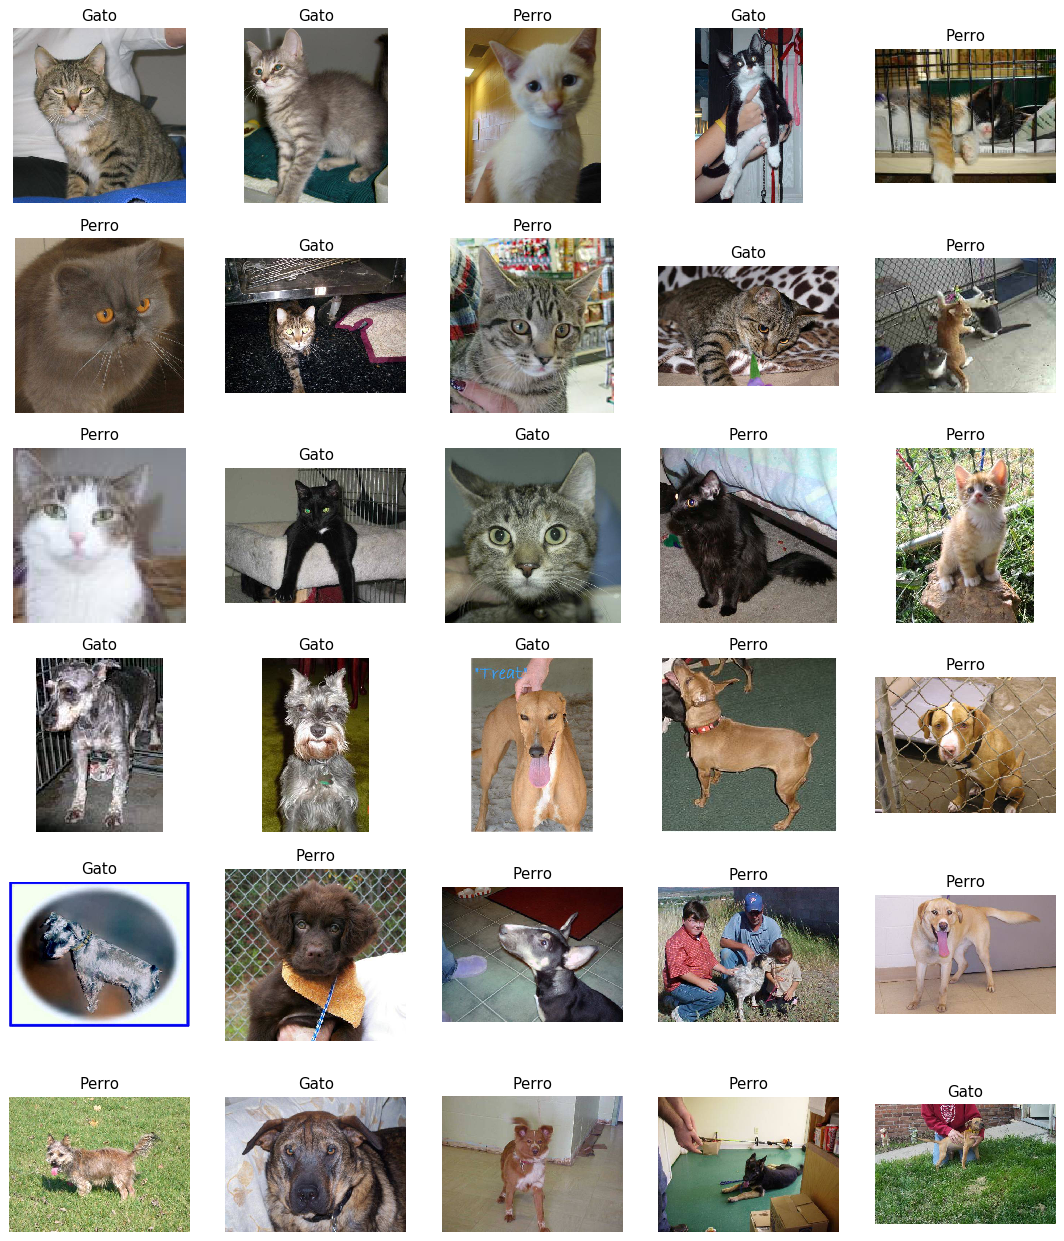

In [143]:
import matplotlib.image as img
# Get classes by np.round
cl = np.round(predicciones)
# Get filenames (set shuffle=false in generator is important)
ncols, nrows = 5, 6
filenames=test_set.filenames
fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
j=1
for i in range(985,1015):
    animal="Gato"
    if cl[i]==1:
        animal="Perro"
    plt.subplot(nrows, ncols, j)
    plt.imshow(img.imread("dogscats/valid/"+filenames[i]))
    plt.title(animal)
    plt.axis('off')
    j=j+1


### Conclusiones
Por motivos de tiempo y pruebas, hasta el momento, se ha obtenido un accuracy en validación referencial de 0.77. Este valor es de suma importancia para compararlo con el modelo que se creará a mano, en este caso hemos realizado 50 epochs.  

Con este valor, se puede observar que la mayoría de predicciones son acertivas!.
Es momento de continuar con nuestro segundo libro.

## Referencias
- Training a Convolutional Neural Network from scratch https://victorzhou.com/blog/intro-to-cnns-part-1/
- CNNs, Part 1: An Introduction to Convolutional Neural Networks https://victorzhou.com/blog/intro-to-cnns-part-1/
- Deep Learning with Keras — Classifying Cats and Dogs (Part 1) https://medium.com/@ferhat00/deep-learning-with-keras-classifying-cats-and-dogs-part-1-982067594856